In [22]:
import os
import io
import numpy as np
import requests

import torch
from torchvision import transforms
from PIL import Image
from sklearn.metrics.pairwise import pairwise_distances
import matplotlib.pyplot as plt

from models import pix2pix
import image_utils

%matplotlib inline

In [23]:
G_path = "./generators/pix2pix_models.pth"
G = pix2pix.UnetGenerator(3, 3, 8)
G.load_state_dict(torch.load(G_path, map_location='cpu'))

In [59]:
def denorm(x):
    out = (x + 1) / 2
    out = out.data.mul(255).clamp(0, 255)
    out = out.byte().permute(1, 2, 0).cpu().numpy()
    return(out)

def generate_model(img):
    transform = transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
    img_tensor = transform(img).unsqueeze(0)
    
    G_img = G(img_tensor).squeeze(0)
        
    ndarry = denorm(G_img)
    return Image.fromarray(ndarry)

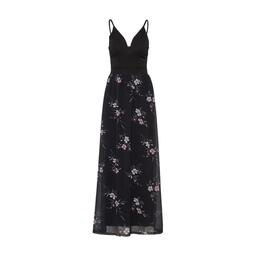

In [60]:
img_path = "./test_images/0affc348db5714e6515de3ea840a32eb.jpg"
img = Image.open(img_path)
img

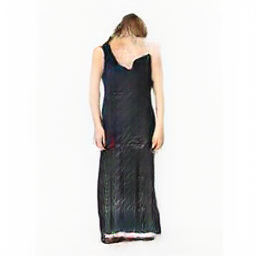

In [61]:
generate_model(img)

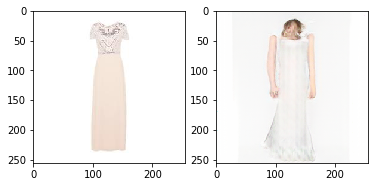

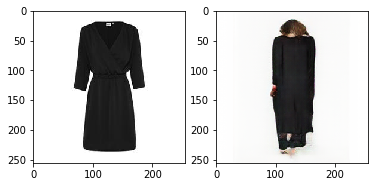

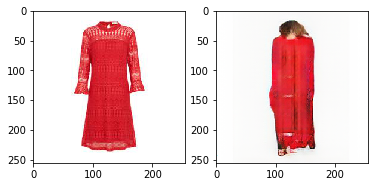

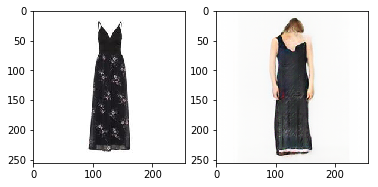

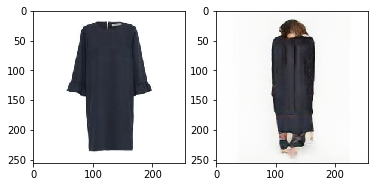

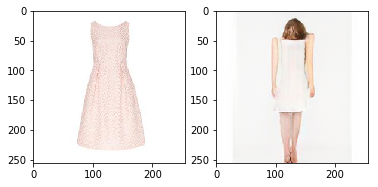

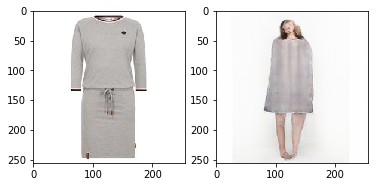

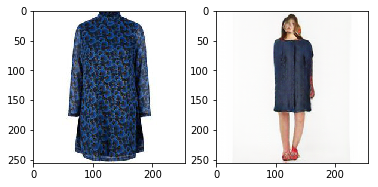

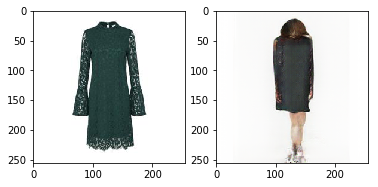

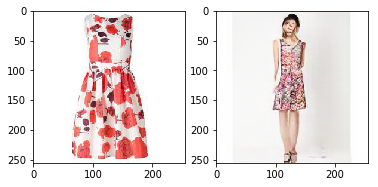

In [64]:
for imgfile in os.listdir('./test_images/'):
    if imgfile.endswith('.jpg'):
        img = Image.open(os.path.join('./test_images/', imgfile))
        fake_img = generate_model(img)
        fig, axarr = plt.subplots(ncols=2, nrows=1)
        axarr[0].imshow(img)
        axarr[1].imshow(fake_img)

In [114]:
data_path = '../../data/zalando_models/kleider_one/'
feature_path = '../../data/models_features/114/dresses/'
filenames = [file.split('.')[0] for file in os.listdir(feature_path) if file.endswith('.npy')]
features = np.array([image_utils.load_feature_vector(os.path.join(feature_path, file + '.npy')) 
                       for file in filenames_models])

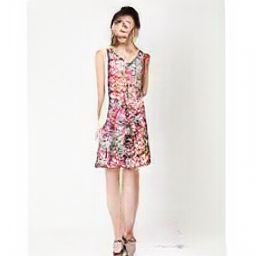

In [115]:
fake_img = generate_model(img)
fake_img

In [118]:
def find_similar_images(img, num_imgs=5, img_size=256):
    
    img = img.resize([img_size, img_size])
    feature64 = image_utils.get_image_feature_by_image(img, feature_size=64)
    feature50 = image_utils.get_image_feature_by_image(img, feature_size=50)
    feature = np.frombuffer(feature64 + feature50, dtype=np.uint8)
    
    dist = pairwise_distances(feature.reshape(1, -1), features)
    best_idx = dist.squeeze(0).argsort()[:num_imgs]
    
    fig, axarr = plt.subplots(ncols=num_imgs+1, nrows=1, figsize=(12, 12))

    axarr[0].imshow(img)
    axarr[0].axis('off')

    for i, idx in enumerate(best_idx):
        ax = axarr[i+1]
        img_path = filenames[idx]
        img = Image.open(os.path.join(data_path, img_path + '.jpg'))
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

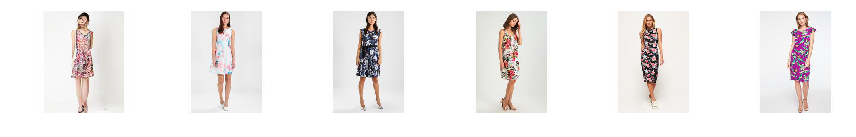

In [119]:
find_similar_images(fake_img)

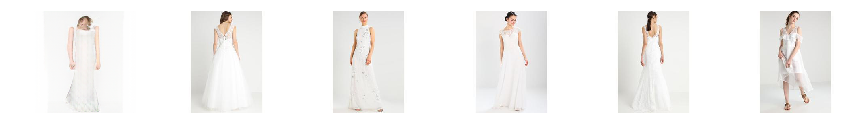

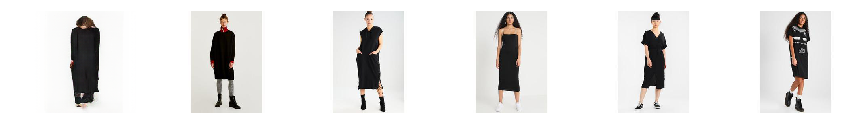

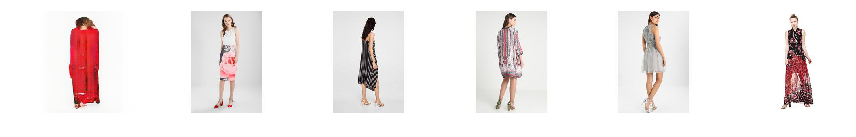

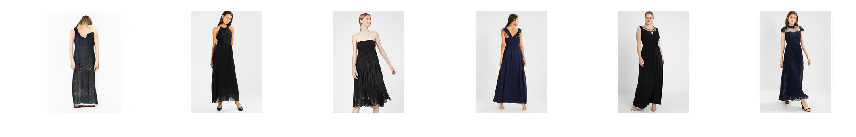

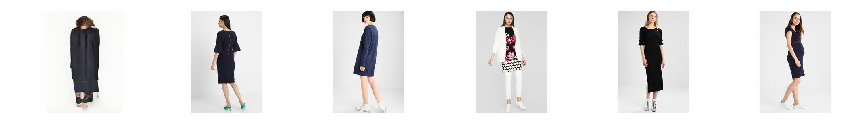

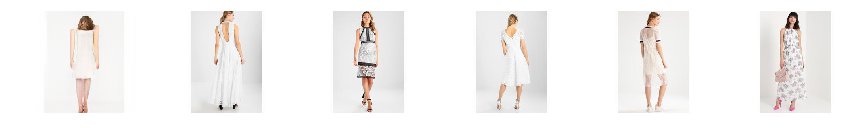

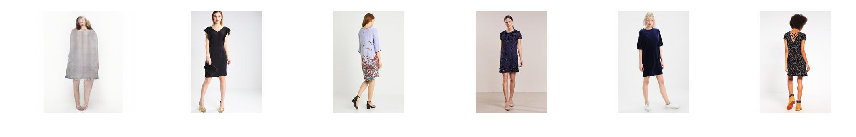

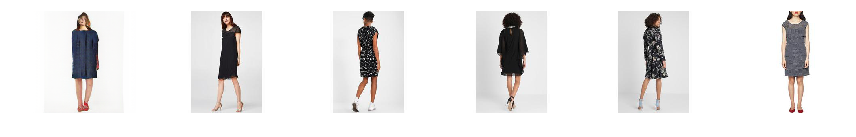

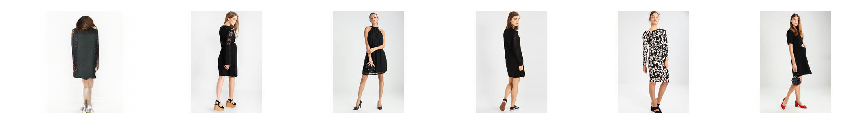

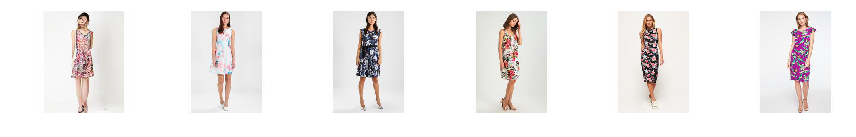

In [121]:
for imgfile in os.listdir('./test_images/'):
    if imgfile.endswith('.jpg'):
        img = Image.open(os.path.join('./test_images/', imgfile))
        fake_img = generate_model(img)
        find_similar_images(fake_img)